In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# бинарная классификация
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [4]:
# пропущенных значений нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1107ca630>,
      dtype=object)

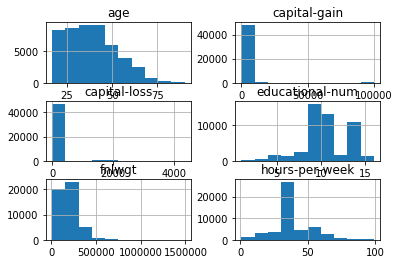

In [5]:
data.hist()

In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'age','workclass', 'education','educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'] ]

# переведем категориальные перменные в 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns, columns = ['workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'native-country'] )


In [9]:
# заменим доход "50K" на 1, "<=50K" на 0
data.income.replace(['>50K', '<=50K'], [1, 0], inplace=True)

y = data['income']

In [10]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit(X)
X_scaled=  x_scaled.transform(X)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y,stratify=y, test_size=0.3, random_state=42)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(x_train,y_train)

y_test_predict = model.predict(x_test)
accuracy = model.score(x_test, y_test)
accuracy

0.8545690302327168

Хорошее начало - 0.85, посмотрим, что еще можно сделать

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

#accuracy = np.round(accuracy_score(y_test, y_test_predict.round()),2)
f1 = np.round(f1_score(y_test, y_test_predict.round()),2)
presicion = np.round(precision_score(y_test, y_test_predict.round()),2)
recall = np.round(recall_score(y_test, y_test_predict.round()),2)

print("Accuracy:", np.round(accuracy, 2))
print("F1-score:" , f1)
print("Precision_score:" , presicion)
print("Recall_score:" , recall)

Accuracy: 0.85
F1-score: 0.66
Precision_score: 0.74
Recall_score: 0.6


In [16]:
LogisticRegression?